# Import packages

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

# Figure Repetition

## Figure 1

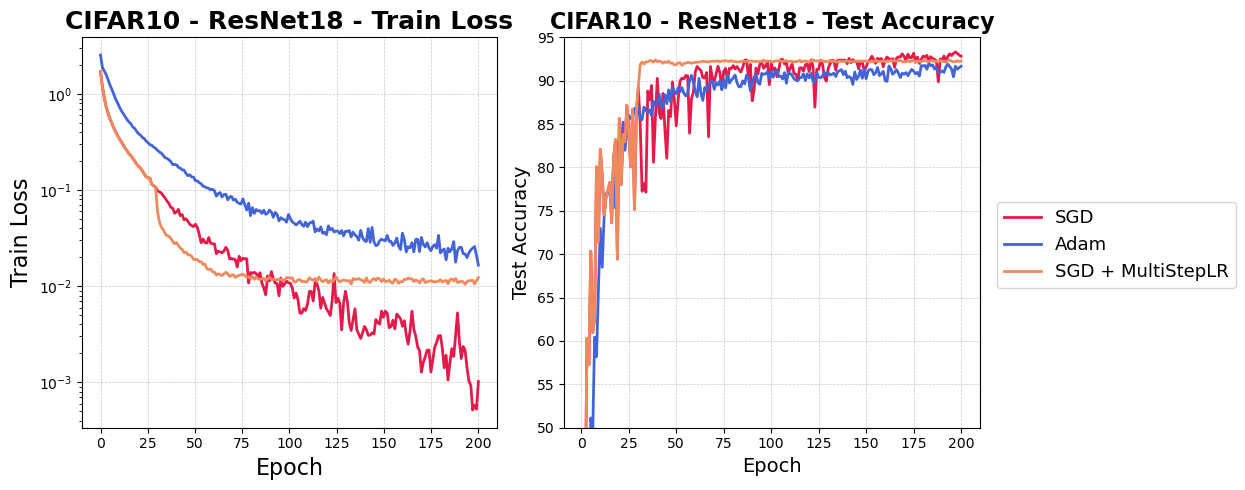

In [2]:
dir_outs = './outs/cifar10_intro/'
Opt = ['SGD','Adam','SGD_MultiStepLR']

method_names = {
    "Adam": "Adam",
    "SGD": "SGD",
    "SGD_MultiStepLR": "SGD + MultiStepLR"
}

method_colors = {
    "Adam": "#4363d8",  # Highlighted color
    "SGD_MultiStepLR": "#f08a5d",  # Highlighted color
    "SGD": "#e6194B"
}

def load_and_plot_results(model_name, axes_col, rseed=100):
    res = {'train_loss': {}, 'test_loss': {}, 'test_acc': {}, 'it_test': {}, 'dlrs': {}}
    for i in Opt:
        with open(f'{dir_outs}{i}_{model_name}_{rseed}_results.json', "r") as f:
            data = json.load(f)
        res['train_loss'][i] = data['epoch_train_losses']
        res['test_loss'][i] = data['test_losses']
        res['test_acc'][i] = data['test_acc']
        res['it_test'][i] = data['it_test']
        res['dlrs'][i] = data['dlrs']
    
    # Plot train_loss
    x = np.linspace(0, 200, 200)
    for optname, values in res['train_loss'].items():
        color = method_colors.get(optname, "black") 
        axes_col[0].plot(x, values, label=method_names.get(optname, optname),color=color, linewidth=2)
    axes_col[0].set_title(f'CIFAR10 - {model_name} - Train Loss', fontsize=18, fontweight='bold')
    axes_col[0].set_xlabel('Epoch', fontsize=16)
    axes_col[0].set_ylabel('Train Loss', fontsize=16)
    axes_col[0].set_yscale('log')
    axes_col[0].grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)

    # Plot test_acc
    x = res['it_test'][Opt[0]]
    for optname, values in res['test_acc'].items():
        color = method_colors.get(optname, "black")
        axes_col[1].plot(x, values, label=method_names.get(optname, optname),color=color, linewidth=2)
    axes_col[1].set_title(f'CIFAR10 - {model_name} - Test Accuracy', fontsize=16, fontweight='bold')
    axes_col[1].set_xlabel('Epoch', fontsize=14)
    axes_col[1].set_ylabel('Test Accuracy', fontsize=14)
    axes_col[1].set_ylim(50, 95)
    axes_col[1].grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)

    return res


fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # Adjusted for 1 row and 2 columns

# Plot results for the single model
models = ['ResNet18']
for col_idx, model in enumerate(models):
    load_and_plot_results(model, axes, rseed=600)  # Pass the single row of axes

# Add a legend at the right of the figure
handles, labels = axes[-1].get_legend_handles_labels()  # Get handles from the last subplot
custom_order = [
    "SGD",
    "Adam",
    "SGD + MultiStepLR"
]
# Reorder handles and labels based on custom_order
sorted_handles_labels = sorted(zip(handles, labels), key=lambda x: custom_order.index(x[1]))
handles, labels = zip(*sorted_handles_labels)

# Add the legend with the new order
fig.legend(
    handles,
    labels,
    loc='center right',
    bbox_to_anchor=(1.25, 0.5),
    fontsize=13
)
# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 1])  # Leave space at the right for the legend

# Save the figure
output_filename = "CIFAR10_intro.png"
plt.savefig(f'./pic/{output_filename}', format='png', dpi=150, bbox_inches='tight')  # Save as PNG with high resolution

# Show the plots
plt.show()

## Figure 2

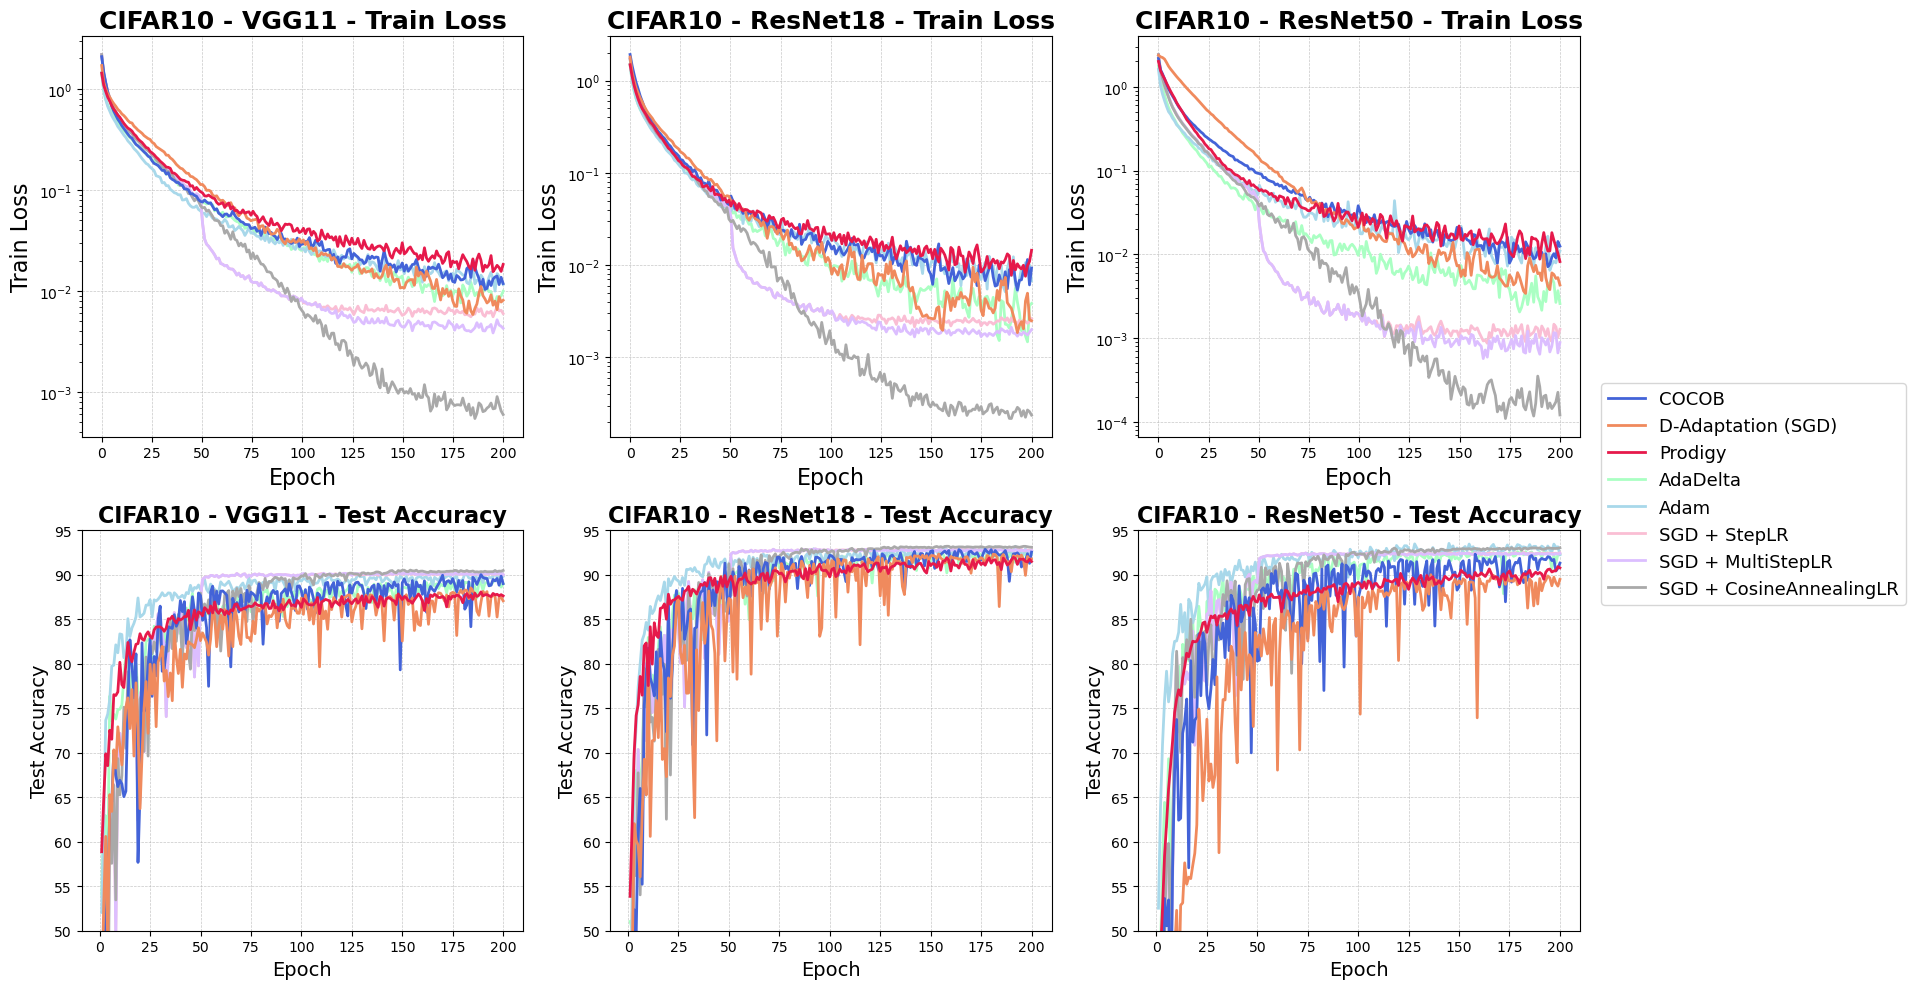

In [3]:
dir_outs = './outs/cifar10_default/'
Opt = ['Adadelta','Adam','SGD_StepLR','SGD_MultiStepLR','SGD_CosLR',
      'COCOB','dadaptation_SGD','Prodigy']

method_names = {
    "COCOB": "COCOB",
    "Dog": "DoG",
    "LDog": "L-DoG",
    "dadaptation_SGD": "D-Adaptation (SGD)",
    "schedulefree": "Schedule-Free (SGD)",
    "Prodigy": "Prodigy",
    "Adadelta": "AdaDelta",
    "Adam": "Adam",
    "SGD_StepLR": "SGD + StepLR",
    "SGD_MultiStepLR": "SGD + MultiStepLR",
    "SGD_CosLR": "SGD + CosineAnnealingLR"
}

method_colors = {
    "COCOB": "#4363d8",  # Highlighted color
    "dadaptation_SGD": "#f08a5d",  # Highlighted color
    "Prodigy": "#e6194B",  # Highlighted color
    "Adadelta": "#aaffc3",
    "Adam": "#a8d8ea",
    "SGD_StepLR": "#fabed4",
    "SGD_MultiStepLR": "#dcbeff",
    "SGD_CosLR": "#a9a9a9"
}

def load_and_plot_results(model_name, axes_col, rseed=100):
    res = {'train_loss': {}, 'test_loss': {}, 'test_acc': {}, 'it_test': {}, 'dlrs': {}}
    for i in Opt:
        with open(f'{dir_outs}{i}_{model_name}_{rseed}_results.json', "r") as f:
            data = json.load(f)
        res['train_loss'][i] = data['epoch_train_losses']
        res['test_loss'][i] = data['test_losses']
        res['test_acc'][i] = data['test_acc']
        res['it_test'][i] = data['it_test']
        res['dlrs'][i] = data['dlrs']
    
    # Plot train_loss
    x = np.linspace(0, 200, 200)
    for optname, values in res['train_loss'].items():
        color = method_colors.get(optname, "black") 
        axes_col[0].plot(x, values, label=method_names.get(optname, optname),color=color, linewidth=2)
    axes_col[0].set_title(f'CIFAR10 - {model_name} - Train Loss', fontsize=18, fontweight='bold')
    axes_col[0].set_xlabel('Epoch', fontsize=16)
    axes_col[0].set_ylabel('Train Loss', fontsize=16)
    axes_col[0].set_yscale('log')
    axes_col[0].grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)

    # Plot test_acc
    x = res['it_test'][Opt[0]]
    for optname, values in res['test_acc'].items():
        color = method_colors.get(optname, "black")
        axes_col[1].plot(x, values, label=method_names.get(optname, optname),color=color, linewidth=2)
    axes_col[1].set_title(f'CIFAR10 - {model_name} - Test Accuracy', fontsize=16, fontweight='bold')
    axes_col[1].set_xlabel('Epoch', fontsize=14)
    axes_col[1].set_ylabel('Test Accuracy', fontsize=14)
    axes_col[1].set_ylim(50, 95)
    axes_col[1].grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)

    return res


fig, axes = plt.subplots(2, 3, figsize=(16, 10))  # Adjusted for 2 rows and 3 columns

# Plot results for each model
models = ['VGG11','ResNet18', 'ResNet50']
for col_idx, model in enumerate(models):
    load_and_plot_results(model, axes[:, col_idx], rseed=600)  # Pass each column

# Add a legend at the bottom of the figure
handles, labels = axes[1, -1].get_legend_handles_labels()  # Get handles from the last subplot
custom_order = [
    "COCOB",
    "D-Adaptation (SGD)",
    "Prodigy",
    "AdaDelta",
    "Adam",
    "SGD + StepLR",
    "SGD + MultiStepLR",
    "SGD + CosineAnnealingLR"
]
# Reorder handles and labels based on custom_order
sorted_handles_labels = sorted(zip(handles, labels), key=lambda x: custom_order.index(x[1]))
handles, labels = zip(*sorted_handles_labels)

# Add the legend with the new order
# fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.1), fontsize=10, ncol=2)
fig.legend(
    handles,
    labels,
    loc='center right',  # Place the legend at the right
    bbox_to_anchor=(1.2, 0.5),  # Adjust anchor point to move it further to the right
    fontsize=13,
    ncol=1  # Single column for better vertical alignment
)
# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 1])  # Leave space at the bottom for the legend

# Save the figure
output_filename = "CIFAR10_result_1.png"
plt.savefig(f'./pic/{output_filename}', format='png', dpi=150, bbox_inches='tight')  # Save as PNG with high resolution

# Show the plots
plt.show()


## Figure 3

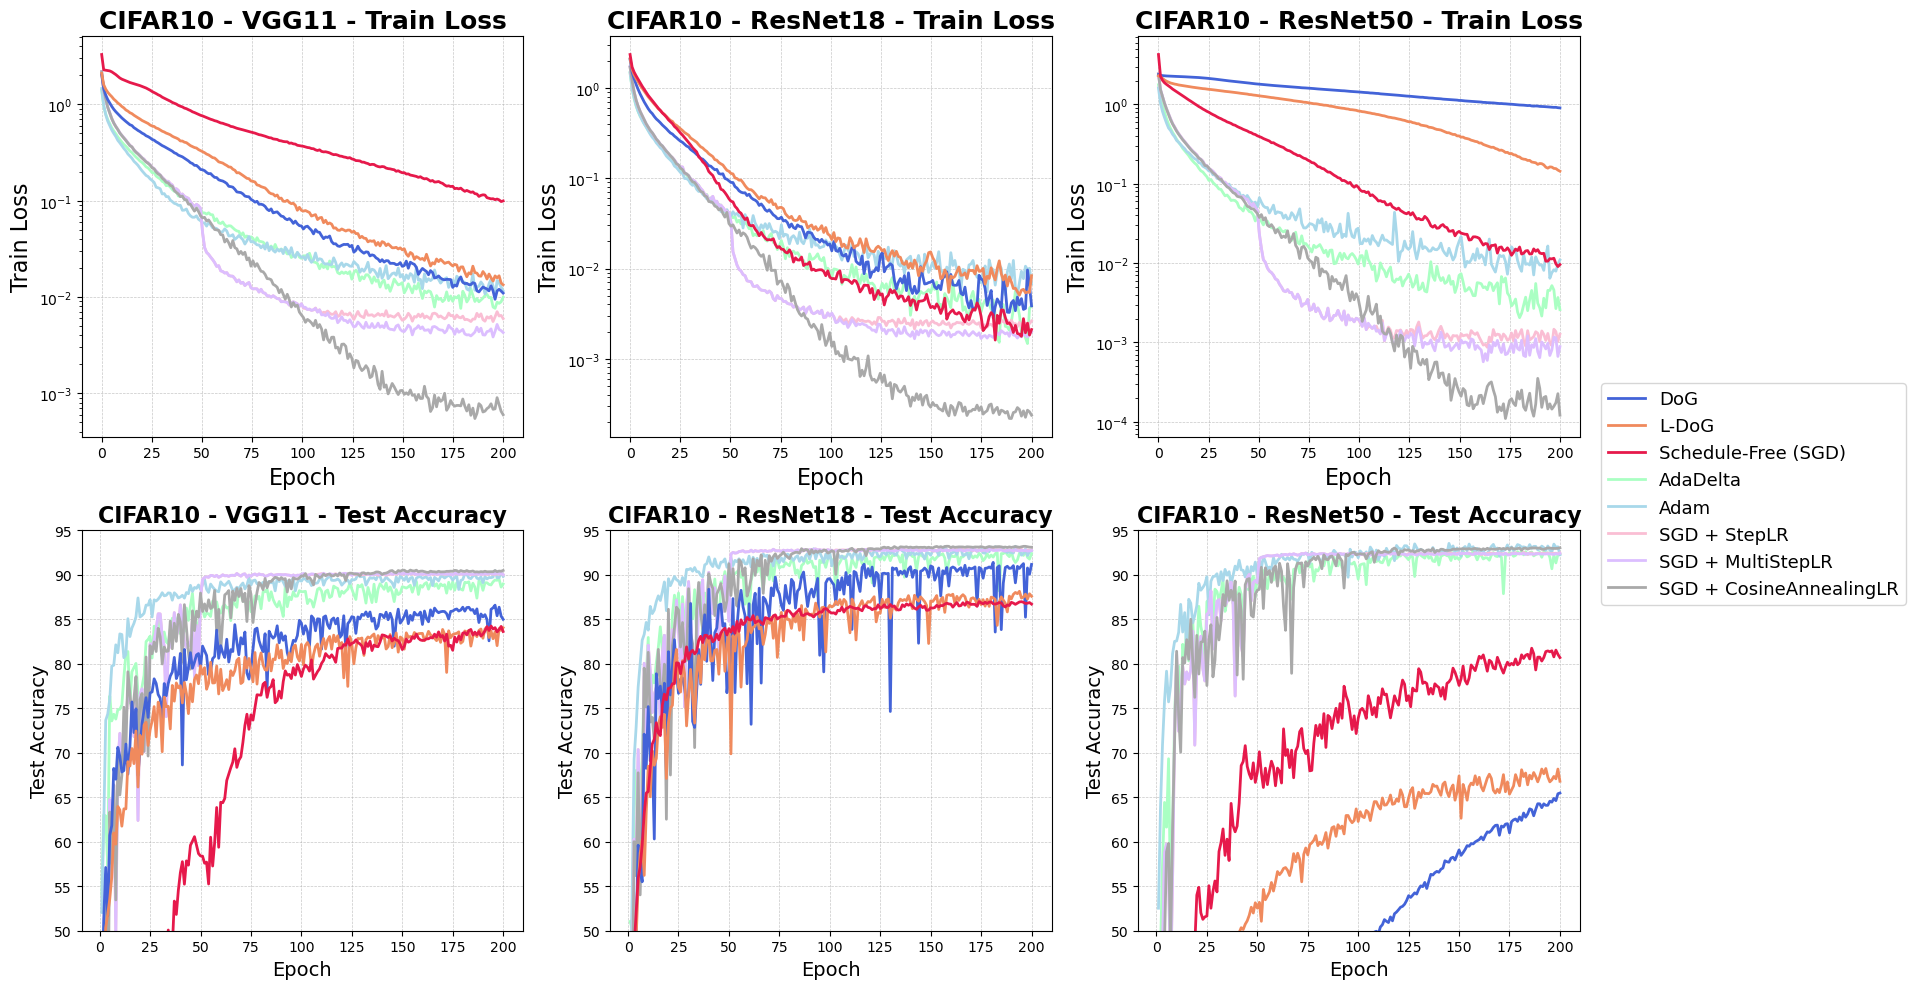

In [4]:
Opt = ['Adadelta','Adam','SGD_StepLR','SGD_MultiStepLR','SGD_CosLR',
      'Dog','LDog','schedulefree']
method_names = {
    "COCOB": "COCOB",
    "Dog": "DoG",
    "LDog": "L-DoG",
    "dadaptation_SGD": "D-Adaptation (SGD)",
    "schedulefree": "Schedule-Free (SGD)",
    "Prodigy": "Prodigy",
    "Adadelta": "AdaDelta",
    "Adam": "Adam",
    "SGD_StepLR": "SGD + StepLR",
    "SGD_MultiStepLR": "SGD + MultiStepLR",
    "SGD_CosLR": "SGD + CosineAnnealingLR"
}

method_colors = {
    "Dog": "#4363d8",  # Highlighted color
    "LDog": "#f08a5d",  # Highlighted color
    "schedulefree": "#e6194B",  # Highlighted color
    "Adadelta": "#aaffc3",
    "Adam": "#a8d8ea",
    "SGD_StepLR": "#fabed4",
    "SGD_MultiStepLR": "#dcbeff",
    "SGD_CosLR": "#a9a9a9"
}

def load_and_plot_results(model_name, axes_col, rseed=100):
    res = {'train_loss': {}, 'test_loss': {}, 'test_acc': {}, 'it_test': {}, 'dlrs': {}}
    for i in Opt:
        with open(f'{dir_outs}{i}_{model_name}_{rseed}_results.json', "r") as f:
            data = json.load(f)
        res['train_loss'][i] = data['epoch_train_losses']
        res['test_loss'][i] = data['test_losses']
        res['test_acc'][i] = data['test_acc']
        res['it_test'][i] = data['it_test']
        res['dlrs'][i] = data['dlrs']
    
    # Plot train_loss
    x = np.linspace(0, 200, 200)
    for optname, values in res['train_loss'].items():
        color = method_colors.get(optname, "black") 
        axes_col[0].plot(x, values, label=method_names.get(optname, optname),color=color, linewidth=2)
    axes_col[0].set_title(f'CIFAR10 - {model_name} - Train Loss', fontsize=18, fontweight='bold')
    axes_col[0].set_xlabel('Epoch', fontsize=16)
    axes_col[0].set_ylabel('Train Loss', fontsize=16)
    axes_col[0].set_yscale('log')
    axes_col[0].grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)

    # Plot test_acc
    x = res['it_test'][Opt[0]]
    for optname, values in res['test_acc'].items():
        color = method_colors.get(optname, "black")
        axes_col[1].plot(x, values, label=method_names.get(optname, optname),color=color, linewidth=2)
    axes_col[1].set_title(f'CIFAR10 - {model_name} - Test Accuracy', fontsize=16, fontweight='bold')
    axes_col[1].set_xlabel('Epoch', fontsize=14)
    axes_col[1].set_ylabel('Test Accuracy', fontsize=14)
    axes_col[1].set_ylim(50, 95)
    axes_col[1].grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)

    return res


fig, axes = plt.subplots(2, 3, figsize=(16, 10))  # Adjusted for 2 rows and 3 columns

# Plot results for each model
models = ['VGG11','ResNet18', 'ResNet50']
for col_idx, model in enumerate(models):
    load_and_plot_results(model, axes[:, col_idx], rseed=600)  # Pass each column

# Add a legend at the bottom of the figure
handles, labels = axes[1, -1].get_legend_handles_labels()  # Get handles from the last subplot
custom_order = [
    "DoG",
    "L-DoG",
    "Schedule-Free (SGD)",
    "AdaDelta",
    "Adam",
    "SGD + StepLR",
    "SGD + MultiStepLR",
    "SGD + CosineAnnealingLR"
]
# Reorder handles and labels based on custom_order
sorted_handles_labels = sorted(zip(handles, labels), key=lambda x: custom_order.index(x[1]))
handles, labels = zip(*sorted_handles_labels)

# Add the legend with the new order
# fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.1), fontsize=10, ncol=2)
fig.legend(
    handles,
    labels,
    loc='center right',  # Place the legend at the right
    bbox_to_anchor=(1.2, 0.5),  # Adjust anchor point to move it further to the right
    fontsize=13,
    ncol=1  # Single column for better vertical alignment
)
# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 1])  # Leave space at the bottom for the legend

# Save the figure
output_filename = "CIFAR10_result_2.png"
plt.savefig(f'./pic/{output_filename}', format='png', dpi=150, bbox_inches='tight')  # Save as PNG with high resolution

# Show the plots
plt.show()

## Figure 4

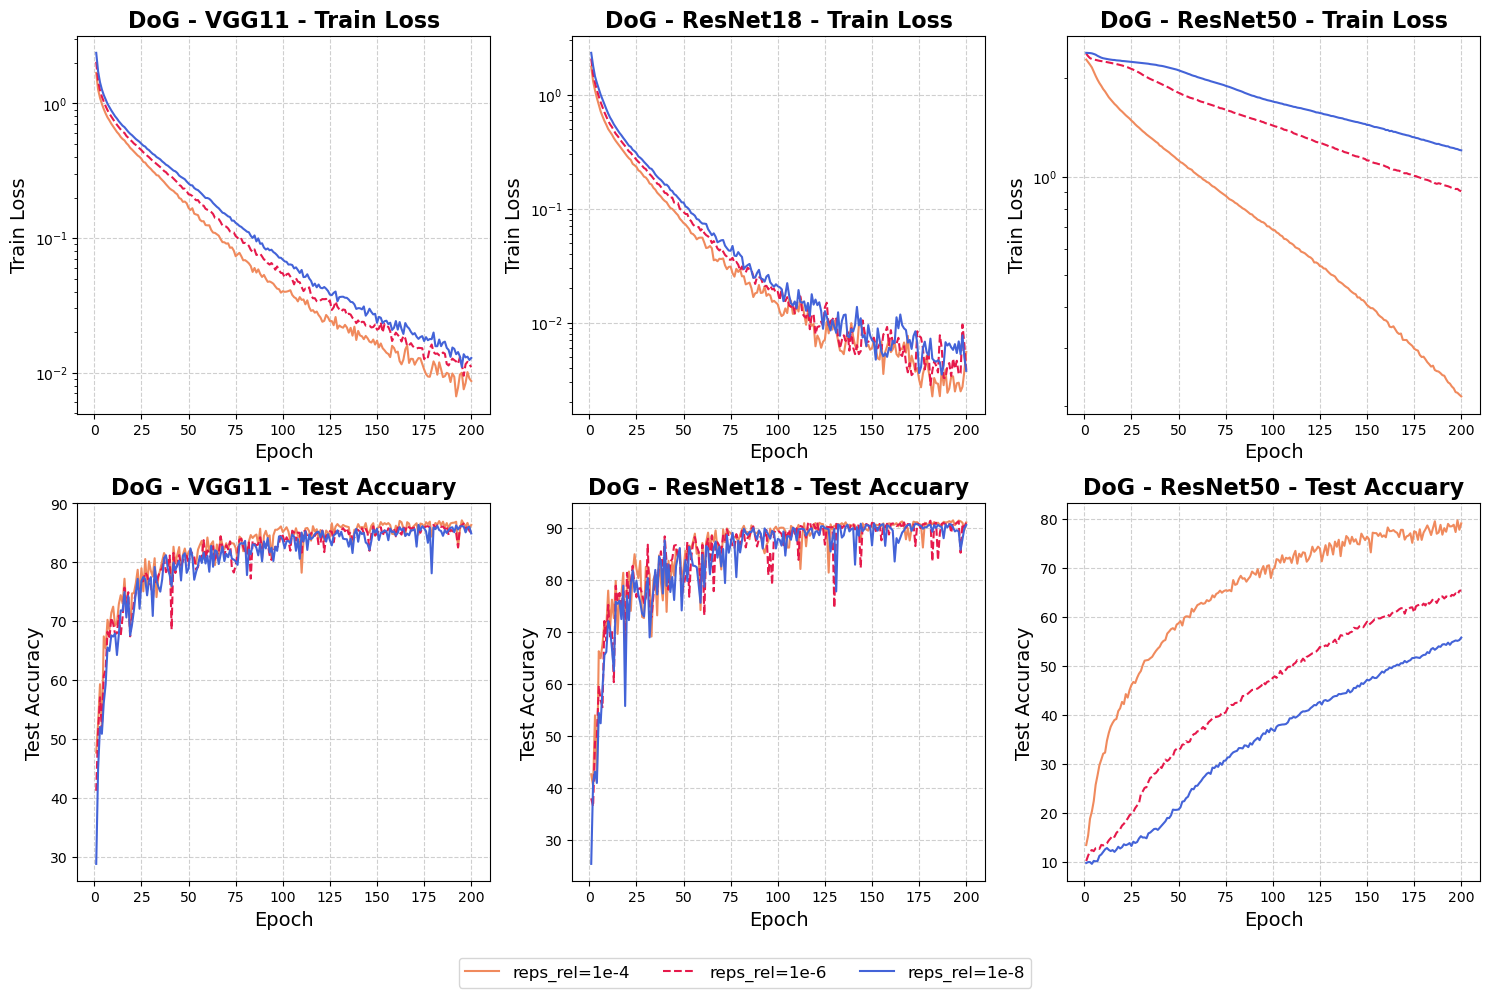

In [5]:
dir_outs = './outs/cifar10_tuning/'
meth = 'Dog'
models = ['VGG11', 'ResNet18', 'ResNet50']
w_steps = ['4', '6', '8']

# 初始化结果字典
results = {}

# 读取数据
for model in models:
    results[model] = {}
    for w_step in w_steps:
        file = f'{meth}_{model}_600_{w_step}_results.json'
        with open(os.path.join(dir_outs, file), "r") as f:
            results[model][w_step] = json.load(f)

# 定义颜色和线型样式
colors = ['#f08a5d', '#e6194B', '#4363d8']  # 三种颜色
linestyles = ['-', '--', '-']  # 三种线型

# 建立2行3列的子图：上面一行画train loss，下面一行画test accuracy，每列对应一个模型
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, model in enumerate(models):
    # 绘制Train Loss (上行)
    for j, (reps_rel, data) in enumerate(results[model].items()):
        axes[0, i].plot(
            data['it_test'],
            data['epoch_train_losses'],
            label=f"reps_rel=1e-{reps_rel}",
            alpha=1,
            color=colors[j],
            linestyle=linestyles[j]
        )
    axes[0, i].set_title(f"DoG - {model} - Train Loss", fontsize=16, weight='bold')
    axes[0, i].set_xlabel("Epoch", fontsize=14)
    axes[0, i].set_ylabel("Train Loss", fontsize=14)
    axes[0, i].set_yscale("log")
    axes[0, i].grid(True, linestyle='--', alpha=0.6)

    # 绘制Test Accuracy (下行)
    for j, (reps_rel, data) in enumerate(results[model].items()):
        axes[1, i].plot(
            data['it_test'],
            data['test_acc'],
            label=f"reps_rel=1e-{reps_rel}",
            alpha=1,
            color=colors[j],
            linestyle=linestyles[j]
        )
    axes[1, i].set_title(f"DoG - {model} - Test Accuary", fontsize=16, weight='bold')
    axes[1, i].set_xlabel("Epoch", fontsize=14)
    axes[1, i].set_ylabel("Test Accuracy", fontsize=14)
    axes[1, i].grid(True, linestyle='--', alpha=0.6)

# 在图的底部添加统一的图例
handles, labels = axes[1, 2].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', fontsize=12, ncol=3)

# 调整布局
plt.tight_layout(rect=[0, 0.05, 1, 1])  
output_filename = f"{meth}_tuning_all_models.png"
plt.savefig(f'./pic/{output_filename}', format='png', dpi=150, bbox_inches='tight')

plt.show()

## Figure 5

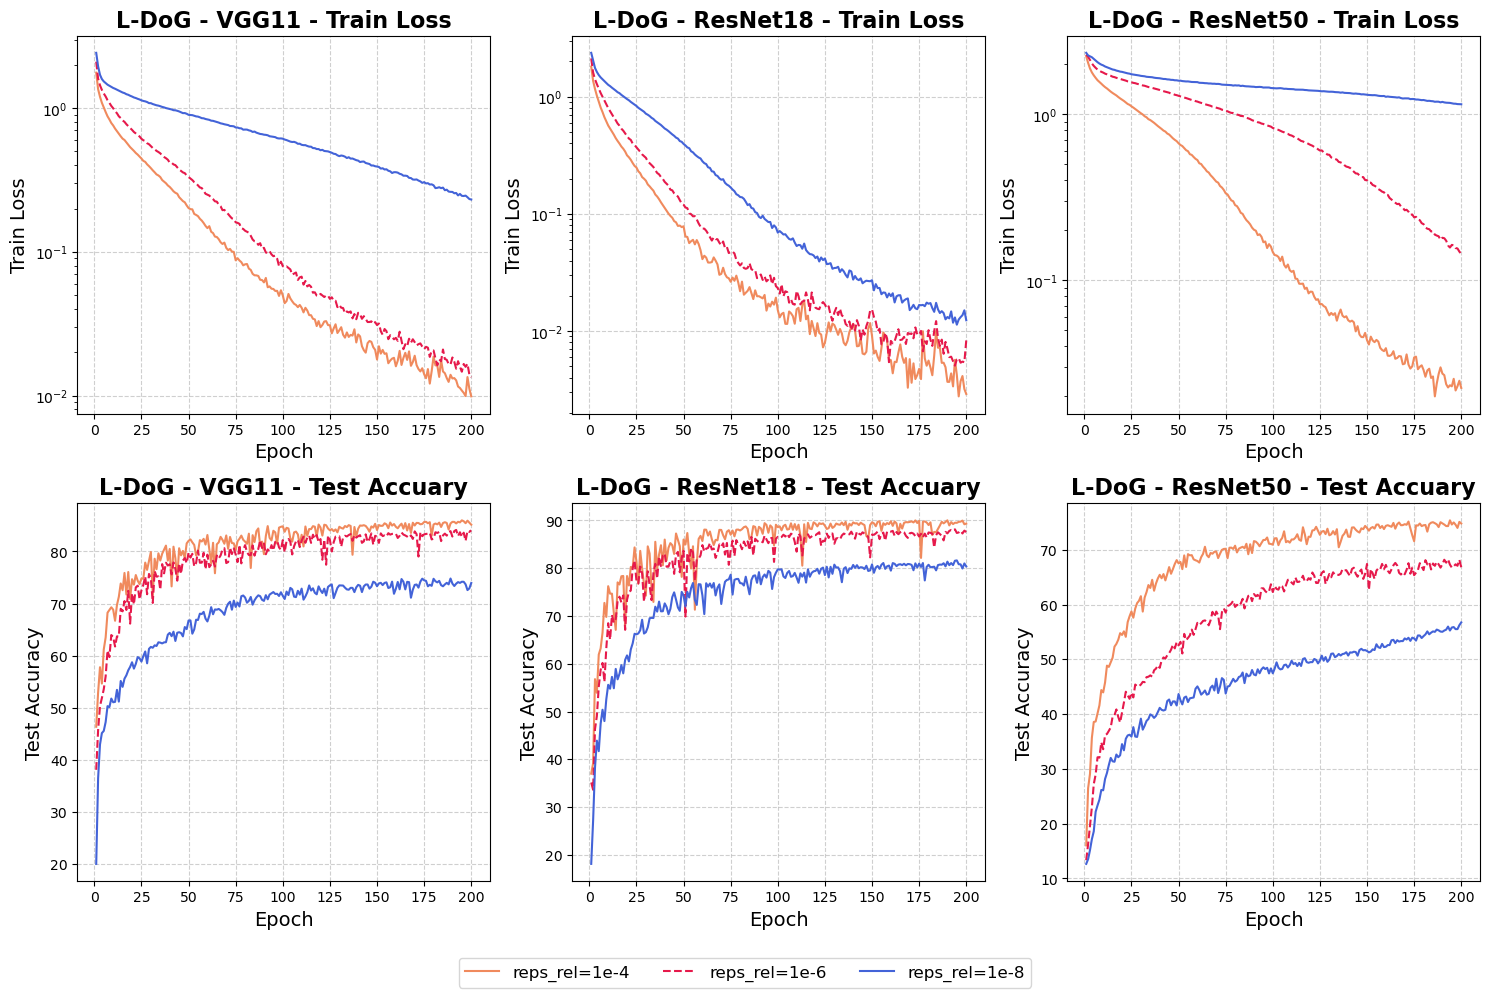

In [6]:
dir_outs = './outs/cifar10_tuning/'
meth = 'LDog'
models = ['VGG11', 'ResNet18', 'ResNet50']
w_steps = ['4', '6', '8']

# 初始化结果字典
results = {}

# 读取数据
for model in models:
    results[model] = {}
    for w_step in w_steps:
        file = f'{meth}_{model}_600_{w_step}_results.json'
        with open(os.path.join(dir_outs, file), "r") as f:
            results[model][w_step] = json.load(f)

# 定义颜色和线型样式
colors = ['#f08a5d', '#e6194B', '#4363d8']  # 三种颜色
linestyles = ['-', '--', '-']  # 三种线型

# 建立2行3列的子图：上面一行画train loss，下面一行画test accuracy，每列对应一个模型
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, model in enumerate(models):
    # 绘制Train Loss (上行)
    for j, (reps_rel, data) in enumerate(results[model].items()):
        axes[0, i].plot(
            data['it_test'],
            data['epoch_train_losses'],
            label=f"reps_rel=1e-{reps_rel}",
            alpha=1,
            color=colors[j],
            linestyle=linestyles[j]
        )
    axes[0, i].set_title(f"L-DoG - {model} - Train Loss", fontsize=16, weight='bold')
    axes[0, i].set_xlabel("Epoch", fontsize=14)
    axes[0, i].set_ylabel("Train Loss", fontsize=14)
    axes[0, i].set_yscale("log")
    axes[0, i].grid(True, linestyle='--', alpha=0.6)

    # 绘制Test Accuracy (下行)
    for j, (reps_rel, data) in enumerate(results[model].items()):
        axes[1, i].plot(
            data['it_test'],
            data['test_acc'],
            label=f"reps_rel=1e-{reps_rel}",
            alpha=1,
            color=colors[j],
            linestyle=linestyles[j]
        )
    axes[1, i].set_title(f"L-DoG - {model} - Test Accuary", fontsize=16, weight='bold')
    axes[1, i].set_xlabel("Epoch", fontsize=14)
    axes[1, i].set_ylabel("Test Accuracy", fontsize=14)
    axes[1, i].grid(True, linestyle='--', alpha=0.6)

# 在图的底部添加统一的图例
handles, labels = axes[1, 2].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', fontsize=12, ncol=3)

# 调整布局
plt.tight_layout(rect=[0, 0.05, 1, 1])  
output_filename = f"{meth}_tuning_all_models.png"
plt.savefig(f'./pic/{output_filename}', format='png', dpi=150, bbox_inches='tight')

plt.show()

## Figure 6

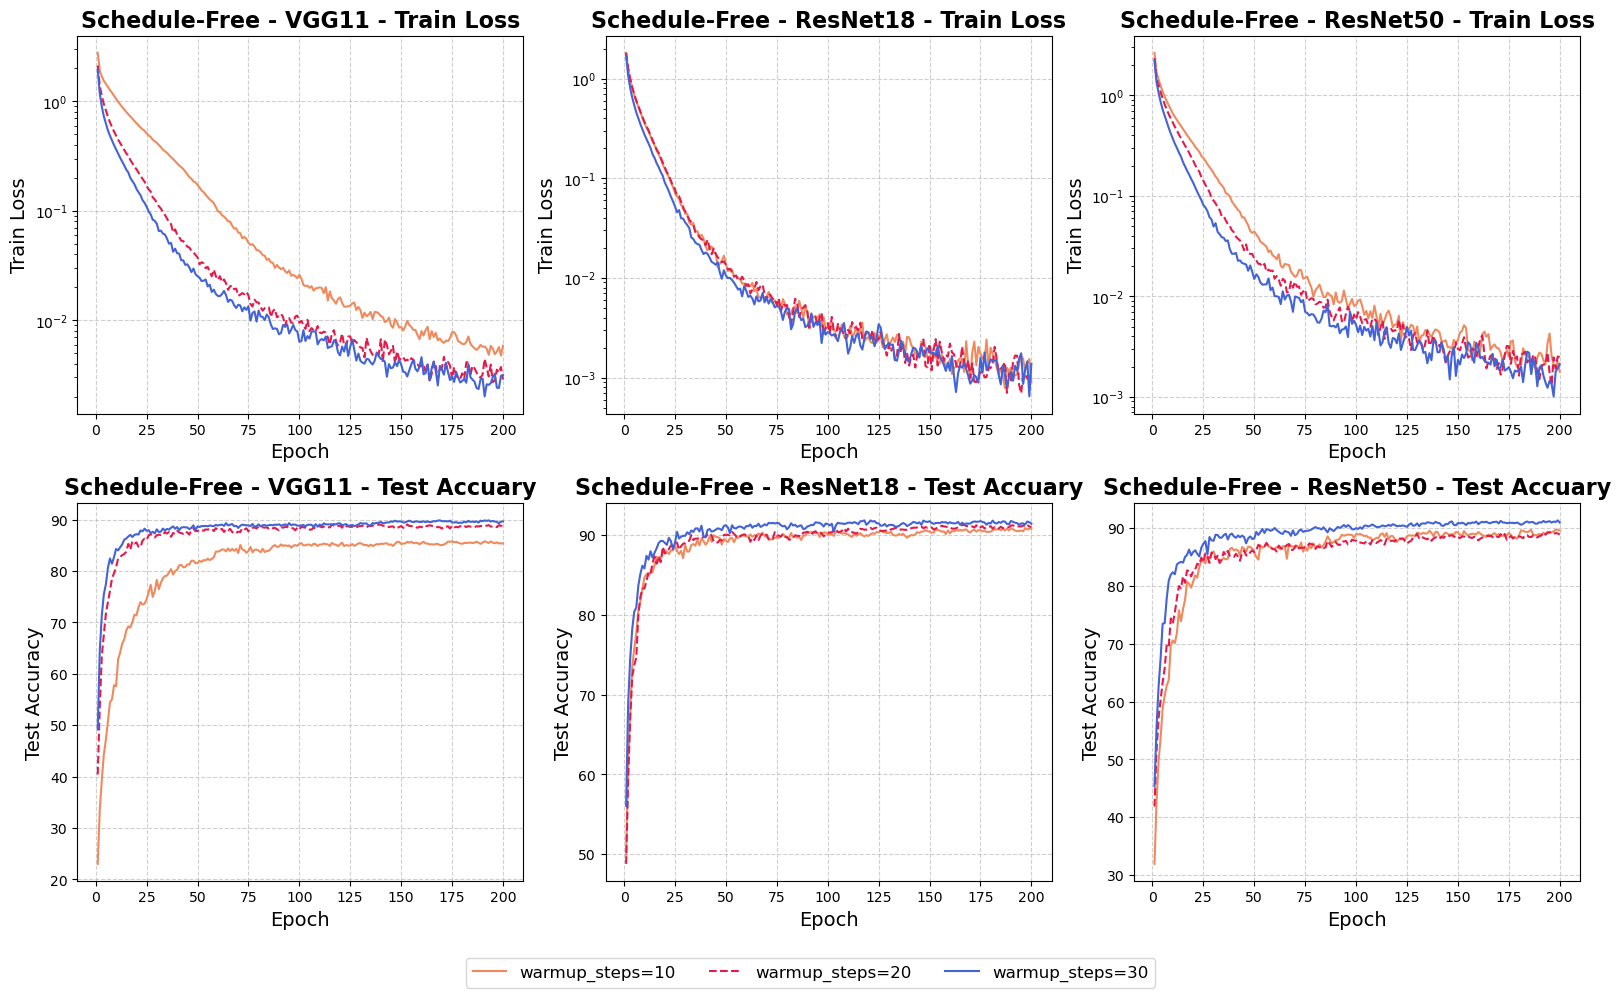

In [7]:
dir_outs = './outs/cifar10_tuning/'
meth = 'schedulefree'
models = ['VGG11', 'ResNet18', 'ResNet50']
w_steps = ['10', '20', '30']

# 初始化结果字典
results = {}

# 读取数据
for model in models:
    results[model] = {}
    for w_step in w_steps:
        file = f'{meth}_{model}_600_{w_step}_results.json'
        with open(os.path.join(dir_outs, file), "r") as f:
            results[model][w_step] = json.load(f)

# 定义颜色和线型样式
colors = ['#f08a5d', '#e6194B', '#4363d8']  # 三种颜色
linestyles = ['-', '--', '-']  # 三种线型

# 建立2行3列的子图：上面一行画train loss，下面一行画test accuracy，每列对应一个模型
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

for i, model in enumerate(models):
    # 绘制Train Loss (上行)
    for j, (w_step, data) in enumerate(results[model].items()):
        axes[0, i].plot(
            data['it_test'],
            data['epoch_train_losses'],
            label=f"warmup_steps={w_step}",
            alpha=1,
            color=colors[j],
            linestyle=linestyles[j]
        )
    axes[0, i].set_title(f"Schedule-Free - {model} - Train Loss", fontsize=16, weight='bold')
    axes[0, i].set_xlabel("Epoch", fontsize=14)
    axes[0, i].set_ylabel("Train Loss", fontsize=14)
    axes[0, i].set_yscale("log")
    axes[0, i].grid(True, linestyle='--', alpha=0.6)

    # 绘制Test Accuracy (下行)
    for j, (w_step, data) in enumerate(results[model].items()):
        axes[1, i].plot(
            data['it_test'],
            data['test_acc'],
            label=f"warmup_steps={w_step}",
            alpha=1,
            color=colors[j],
            linestyle=linestyles[j]
        )
    axes[1, i].set_title(f"Schedule-Free - {model} - Test Accuary", fontsize=16, weight='bold')
    axes[1, i].set_xlabel("Epoch", fontsize=14)
    axes[1, i].set_ylabel("Test Accuracy", fontsize=14)
    axes[1, i].grid(True, linestyle='--', alpha=0.6)

# 在图的底部添加统一的图例
handles, labels = axes[1, 2].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', fontsize=12, ncol=3)

# 调整布局
plt.tight_layout(rect=[0, 0.05, 1, 1])  
output_filename = f"{meth}_tuning_all_models.png"
plt.savefig(f'./pic/{output_filename}', format='png', dpi=150, bbox_inches='tight')

plt.show()


## Figure 7

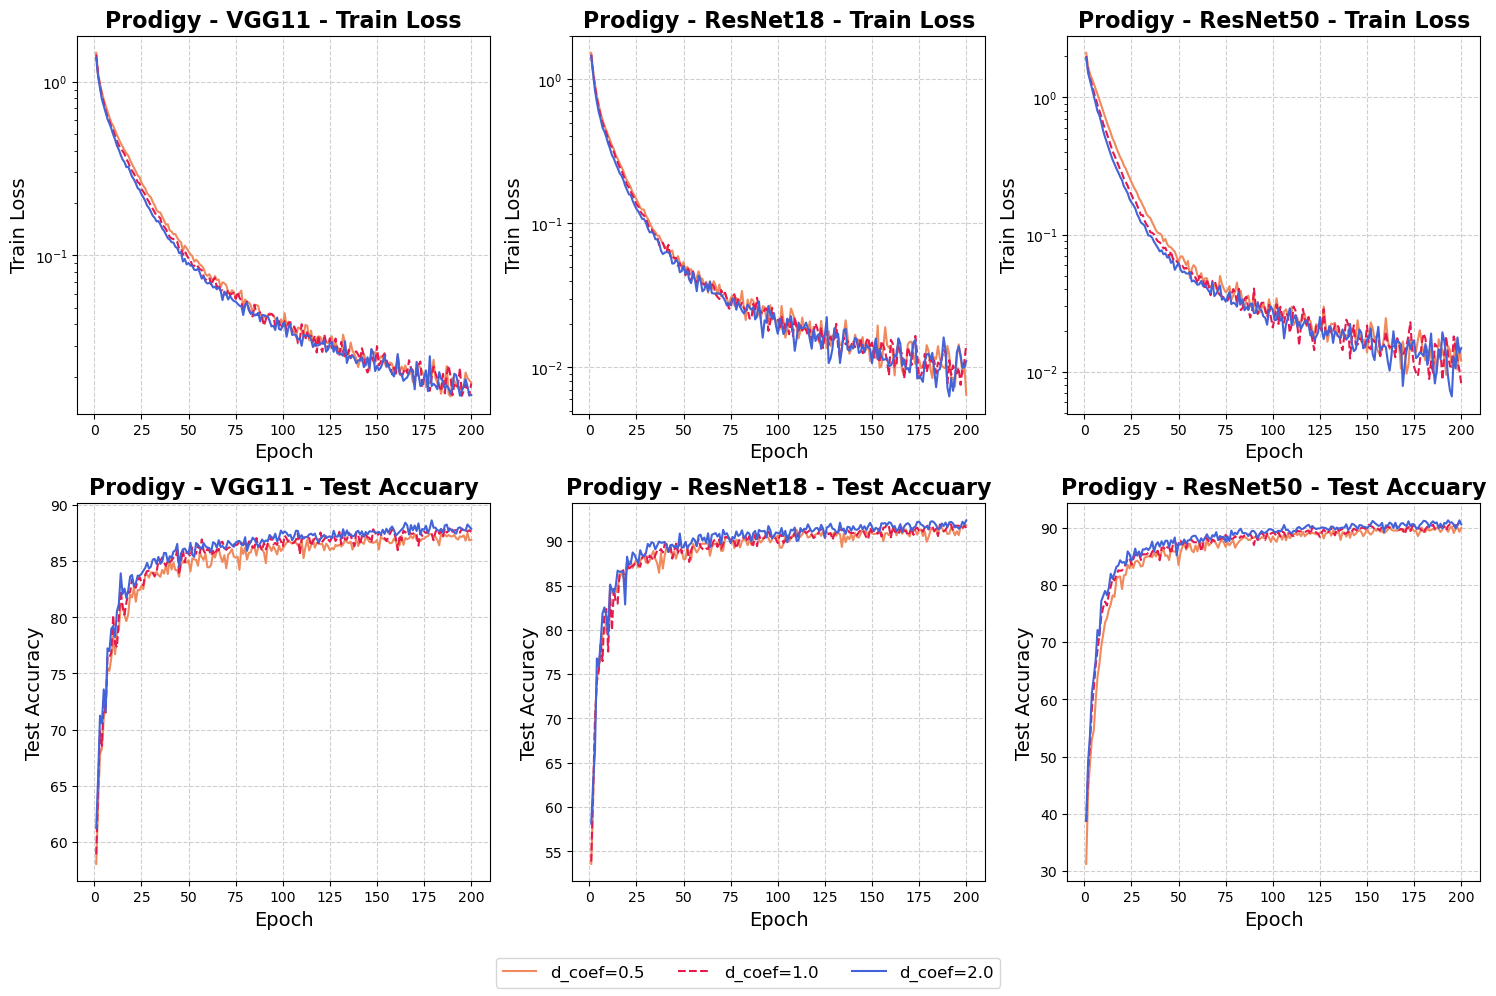

In [8]:
dir_outs = './outs/cifar10_tuning/'
meth = 'Prodigy'
models = ['VGG11', 'ResNet18', 'ResNet50']
d_coefs = ['0.5', '1.0', '2.0']

# 初始化结果字典
results = {}

# 读取数据
for model in models:
    results[model] = {}
    for d_coef in d_coefs:
        file = f'{meth}_{model}_600_{d_coef}_results.json'
        with open(os.path.join(dir_outs, file), "r") as f:
            results[model][d_coef] = json.load(f)

# 定义颜色和线型样式
colors = ['#f08a5d', '#e6194B', '#4363d8']  # 三种颜色
linestyles = ['-', '--', '-']  # 三种线型

# 建立2行3列的子图：上面一行画train loss，下面一行画test accuracy，每列对应一个模型
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, model in enumerate(models):
    # 绘制Train Loss (上行)
    for j, (d_coef, data) in enumerate(results[model].items()):
        axes[0, i].plot(
            data['it_test'],
            data['epoch_train_losses'],
            label=f"d_coef={d_coef}",
            alpha=1,
            color=colors[j],
            linestyle=linestyles[j]
        )
    axes[0, i].set_title(f"{meth} - {model} - Train Loss", fontsize=16, weight='bold')
    axes[0, i].set_xlabel("Epoch", fontsize=14)
    axes[0, i].set_ylabel("Train Loss", fontsize=14)
    axes[0, i].set_yscale("log")
    axes[0, i].grid(True, linestyle='--', alpha=0.6)

    # 绘制Test Accuracy (下行)
    for j, (d_coef, data) in enumerate(results[model].items()):
        axes[1, i].plot(
            data['it_test'],
            data['test_acc'],
            label=f"d_coef={d_coef}",
            alpha=1,
            color=colors[j],
            linestyle=linestyles[j]
        )
    axes[1, i].set_title(f"{meth} - {model} - Test Accuary", fontsize=16, weight='bold')
    axes[1, i].set_xlabel("Epoch", fontsize=14)
    axes[1, i].set_ylabel("Test Accuracy", fontsize=14)
    axes[1, i].grid(True, linestyle='--', alpha=0.6)

# 在图的底部添加统一的图例
handles, labels = axes[1, 2].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', fontsize=12, ncol=3)

# 调整布局
plt.tight_layout(rect=[0, 0.05, 1, 1])  
output_filename = f"{meth}_tuning_all_models.png"
plt.savefig(f'./pic/{output_filename}', format='png', dpi=150, bbox_inches='tight')

plt.show()


## Figure 8

LDog_training_results.json
dadaptation_SGD_training_results.json
Prodigy_training_results.json
COCOB_training_results.json
schedulefree_training_results.json
Dog_training_results.json
Adamax_training_results.json


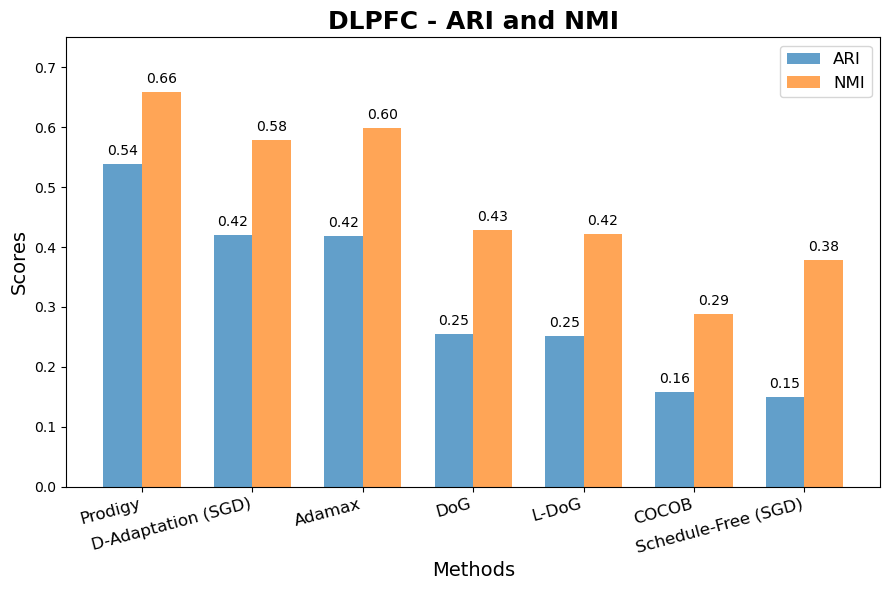

In [9]:
dir_outs = "./outs/DLPFC/"

# 存储方法名称和数据
methods_data = {}

# 读取所有JSON文件
for filename in os.listdir(dir_outs):
    if filename.endswith(".json"):
        if filename == "Prodigy_embedding_results.json":
            continue
        method_name = filename.split("_")[0]  # 获取方法的名称
        print(filename)
        with open(os.path.join(dir_outs, filename), "r") as f:
            data = json.load(f)
            methods_data[method_name] = data

# 自定义方法名称映射（可以根据需要修改）
method_rename_map = {
    "Adamax": "Adamax",
    "COCOB": "COCOB",
    "dadaptation": "D-Adaptation (SGD)",
    "Dog": "DoG",
    "LDog": "L-DoG",
    "Prodigy": "Prodigy",
    "schedulefree": "Schedule-Free (SGD)"
}

methods = ["Adamax","COCOB","dadaptation","Dog","LDog","Prodigy","schedulefree"]

ari_scores = [methods_data[method]['ARI'][0] for method in methods]
nmi_scores = [methods_data[method]['NMI'][0] for method in methods]

sorted_indices = np.argsort(ari_scores)[::-1]  # 逆序排序索引
methods = [methods[i] for i in sorted_indices]
ari_scores = [ari_scores[i] for i in sorted_indices]
nmi_scores = [nmi_scores[i] for i in sorted_indices]

# 重命名方法
methods = [method_rename_map.get(method, method) for method in methods]

# 画条形图
x = np.arange(len(methods))  # 方法的索引
width = 0.35  # 条形的宽度

fig, ax = plt.subplots(figsize=(9, 6))

# "#4363d8",  # Highlighted color
# "dadaptation_SGD": "#f08a5d",  # Highlighted color
# "Prodigy": "#e6194B"

bars1 = ax.bar(x - width / 2, ari_scores, width, label='ARI', alpha=0.7)
bars2 = ax.bar(x + width / 2, nmi_scores, width, label='NMI', alpha=0.7)

# 设置加粗标题和标签
ax.set_xlabel("Methods", fontsize=14)
ax.set_ylabel("Scores", fontsize=14)
ax.set_title("DLPFC - ARI and NMI", fontsize=18, weight='bold')
ax.set_xticks(x)
ax.set_ylim(0, 0.75)
ax.set_xticklabels(methods, rotation=15, ha='right', fontsize=12)

# 添加图例
ax.legend(fontsize=12)

# 添加条形顶部的值
for bar in bars1:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f"{yval:.2f}", ha="center", va="bottom", fontsize=10)

for bar in bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f"{yval:.2f}", ha="center", va="bottom", fontsize=10)

# 添加网格线
# plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

output_filename = "DLPFC_Results.png"
plt.savefig(f'./pic/{output_filename}', format='png', dpi=150, bbox_inches='tight')  # Save as PNG with high resolution

plt.show()

## Figure 9

In [10]:
dir_outs = "./outs/DLPFC/"
file_path = f"{dir_outs}Prodigy_cell_emb_df.csv"  # 替换为文件的实际路径
cell_emb_df = pd.read_csv(file_path)

In [11]:
cell_emb_df

,umap_1,umap_2,cluster,batch,layer
0,13.615263,5.079831,4,0,Layer_3
1,9.691676,3.534486,2,0,Layer_1
2,2.952835,8.118918,6,0,WM
3,14.311905,5.226135,0,0,Layer_3
4,8.318651,6.225190,3,0,Layer_5
...,...,...,...,...,...
14238,9.849380,8.734858,1,3,Layer_6
14239,3.717025,7.364613,6,3,WM
14240,2.219060,7.952801,6,3,WM
14241,9.500665,5.508366,3,3,Layer_6


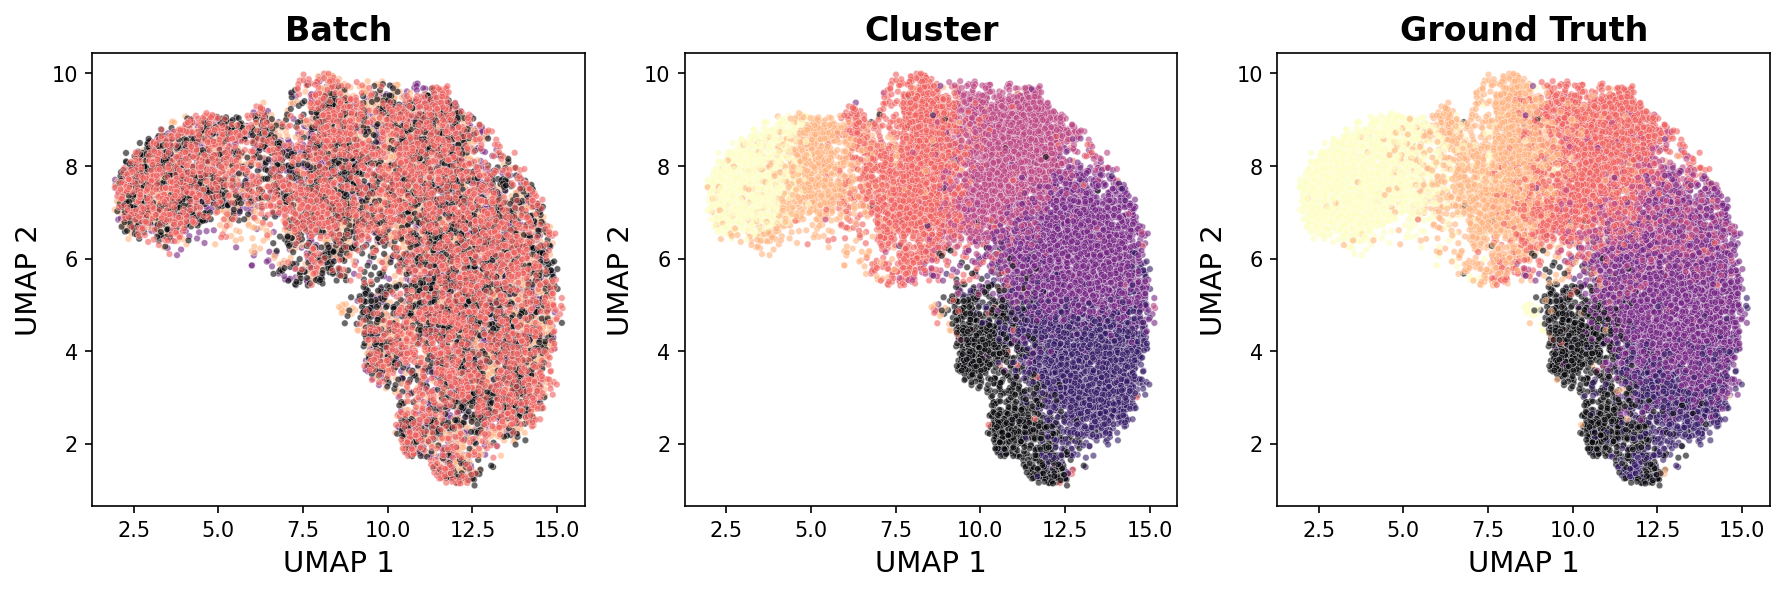

In [12]:
# 自定义调色盘，指定 layer 中每个 label 对应的颜色
layer_colors = {
    'Layer_1': '#040408',
    'Layer_2': '#321764',
    'Layer_3': '#752383',
    'Layer_4': '#bc4482',
    'Layer_5': '#f1605d',
    'Layer_6': '#ffb37e',
    'WM': '#fdfec1'
}

cluster_colors = {
    0: '#321764',
    1: '#bc4482',
    2: '#040408',
    3: '#f1605d',
    4: '#752383',
    5: '#ffb37e',
    6: '#fdfec1'
}

batch_colors = {
    0: '#752383',
    1: '#ffb37e',
    2: '#040408',
    3: '#f1605d'
}

# 定义绘图函数
def plot_umap_subplot(ax, data, hue, title, palette=None, hue_order=None):
    # 绘制散点图
    sns.scatterplot(
        data=data,
        x='umap_1',
        y='umap_2',
        hue=hue,             # 按照传入的 hue 分配颜色
        palette=palette,     # 使用指定的颜色映射
        hue_order=hue_order, # 保证 hue 顺序
        ax=ax,
        alpha=0.6,
        s=10                 # 调整点的大小
    )

    # 设置标题
    ax.set_title(title, fontsize=16, weight='bold')  # 加粗标题
    ax.set_xlabel("UMAP 1", fontsize=14)  # 加大 X 轴标签字体
    ax.set_ylabel("UMAP 2", fontsize=14)  # 加大 Y 轴标签字体
    ax.legend().remove()

# 创建 1x3 子图
fig, axes = plt.subplots(1, 3, figsize=(12,4.5), dpi=150)

# 子图标题和 hue 列表
titles = [
    'Batch',
    'Cluster',
    'Ground Truth'
]
hues = ['batch', 'cluster', 'layer']

# 循环绘制子图
for ax, hue, title in zip(axes, hues, titles):
    if hue == 'layer':  # 如果是 layer，应用指定颜色映射
        plot_umap_subplot(
            ax, cell_emb_df, hue, title,
            palette=layer_colors,
            hue_order=list(layer_colors.keys())
        )
    elif hue == 'cluster':
        plot_umap_subplot(
            ax, cell_emb_df, hue, title,
            palette=cluster_colors,
            hue_order=list(cluster_colors.keys())
        )
    else:  # 其他使用默认调色盘
        plot_umap_subplot(
            ax, cell_emb_df, hue, title, 
            palette=batch_colors,
            hue_order=list(batch_colors.keys())
        )

# 调整布局
plt.tight_layout(rect=[0, 0.1, 1, 1])  # 留出空间给下方图例
output_filename = "DLPFC_embedding.png"
plt.savefig(f'./pic/{output_filename}', format='png', dpi=150, bbox_inches='tight')  # Save as PNG with high resolution
# 显示图像
plt.show()